In [1]:
import matplotlib.pyplot as plt
import numpy as np
import run
from run import g, temp, gs, gss
from run import with_spline_ODE, steps_taken
import der

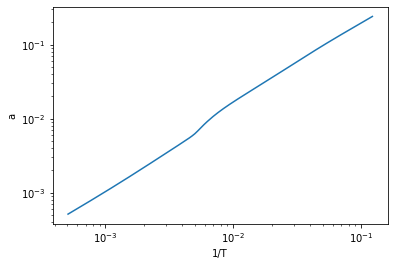

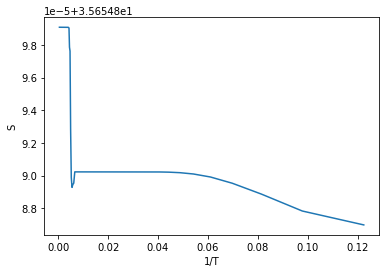

In [2]:
index = np.where(temp <1/2000)[0][-1]
index2 = np.where(temp < 1/10)[0][-1]

N = 100
f_initial = np.zeros(N)
y_0 = np.zeros(N+3)
p = np.zeros(N+15) 

x0 = temp[index] 
dx0 = x0 / 1000
xf = temp[index + 1]

Le0 = 7.6e-4

y_0[:N] = f_initial
y_0[-3:] = [Le0, 0, x0]
p[:N] = np.linspace(10/100, 10, 100)
p[-5:] = [Le0, Le0, y_0[-3], 10**(-10), 0.064]
p[-10:-5] = gs[index, :] 
p[-15:-10] = gss[index, :] 


x, y , dx, s = steps_taken(x0, y_0, dx0, p, xf, index, index2)


plt.figure()
plt.loglog(x,y[:,-1])
plt.xlabel("1/T")
plt.ylabel("a")
plt.show()


plt.figure()
plt.plot(x, s)
plt.xlabel("1/T")
plt.ylabel("S")

plt.show()

In [3]:
mixing_angle  = str(p[-2])
lepton_number = str(p[-3])

np.savez(lepton_number +'x'+ mixing_angle , T = 1/x, #temperature 
                       final_distribution = y[-1,:N], #final sterile distribution
                                  epsilon = p[:N],  #epsilon array
                                  lep_evo = y[:,-3], #Lepton number evolution
                                        a = y[:,-1], #scale factor
                                        t = y[:,-2], #time evolution
                              sterile_evo = y[:,:N], #sterile distribution evolution
                                mass_s    = p[-1], #mass
                        mixangle_medium   = p[-2], #mixing angle
                         initial_electron  = p[-3], ###initial lepton numbers 
                         initial_mu       = p[-4],
                         initial_tau      = p[-5])




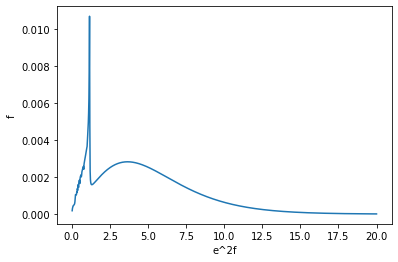

In [4]:
test = np.load('0.00076x1e-10.npz')
#print(test.files)
#print(test['initial_tau'])


dat = np.load('1x0.00049x3e-09-data.npz')
fe = dat['f_full']
epsilon = dat['eps_full']
plt.figure()
plt.plot(epsilon, epsilon**(2)*fe)
plt.xlabel('e^2f')
plt.ylabel("f")

plt.show() ##proportional to a number density spectrum

In [5]:
def trapezoid(x,y):
    N=len(x)
    summ = 0
    for i in range(N-1):
        I = 0.5*(y[i]+ y[i+1])*(x[i+1] - x[i])
        summ = summ + I
    return summ

In [6]:
new_epsilon = np.zeros(len(epsilon) + 1)
new_epsilon[1:] = epsilon
new_fe = np.zeros(len(fe) + 1)
new_fe[1:] = fe

x = new_epsilon[::4]
y = np.zeros(len(x))

epsilon.shape[0]

1000

In [7]:
##trapezoid rule forced low approximation 

def new_whys(steps):
    m = steps + 1 
    tri_area = trapezoid(new_epsilon[0:m],new_epsilon[0:m]**(2)*new_fe[0:m])
    y[1] = (2*(tri_area))/(x[1]**3)

    for i in range(1,len(x)-1):
        m = steps*i
        n = m + 5 
        trap_area = trapezoid(new_epsilon[m:n],new_epsilon[m:n]**(2)*new_fe[m:n])
        y[i + 1] = (2*trap_area - (y[i]*x[i]**2)*(x[i + 1] - x[i]))/(x[i + 1]**2*(x[i + 1] - x[i]))
    return y 
new_whys(4)


array([ 0.00000000e+00,  8.53068472e-02,  1.61826891e-02,  1.80924318e-02,
        1.05794291e-02,  9.43316586e-03,  7.35453591e-03,  6.31411868e-03,
        5.28505612e-03,  4.86510292e-03,  3.98993328e-03,  4.20786824e-03,
        3.62425475e-03,  3.92627372e-03,  4.70616377e-03,  5.43703059e-03,
       -2.59331375e-03,  4.02417717e-03, -2.01317202e-03,  3.27769575e-03,
       -1.57434544e-03,  2.73550940e-03, -1.25351934e-03,  2.32323282e-03,
       -1.01505235e-03,  2.00047703e-03, -8.34584422e-04,  1.74197999e-03,
       -6.95807028e-04,  1.53102224e-03, -5.87597883e-04,  1.35611762e-03,
       -5.02197988e-04,  1.20914030e-03, -4.34077690e-04,  1.08419799e-03,
       -3.79220065e-04,  9.76925467e-04, -3.34657506e-04,  8.84026821e-04,
       -2.98164976e-04,  8.02970878e-04, -2.68052467e-04,  7.31783654e-04,
       -2.43021704e-04,  6.68904036e-04, -2.22065382e-04,  6.13081562e-04,
       -2.04395109e-04,  5.63302812e-04, -1.89389100e-04,  5.18737600e-04,
       -1.76553660e-04,  

In [8]:
##working right rectangle approximation
def right_rectangle(steps):
    m = steps + 1
    area = trapezoid(new_epsilon[0:m],new_epsilon[0:m]**(2)*new_fe[0:m])
    y[1] = (area)/((x[1] - x[0])*x[2]**2)
    for i in range(1,len(x)-1):
        m = steps*i
        n = m + 5 
        area = trapezoid(new_epsilon[m:n],new_epsilon[m:n]**(2)*new_fe[m:n])
        y[i + 1] =(area)/((x[i + 1] - x[i])*x[i + 1]**2)
    return y
quan = trapezoid(new_epsilon, new_epsilon**(2)*new_fe)
print(quan)
quan2 = trapezoid(x, x**(2)*right_rectangle(4))
print(quan2)

0.021452118725550917
0.02143532444786751


In [9]:
value = epsilon.shape[0]
def factors(value, x):
    tmp_lst = []
    for i in range(1, value + 1):
        if value % i == 0:
            tmp_lst.append(i) 
    if x in tmp_lst: 
        return True
    else:
        
        return False

In [10]:
factors(1000,6)

False

In [11]:
dat = np.load('1x0.00049x3e-09-data.npz') ## if we need the Y_values function can take two inputs, 
fe = dat['f_full']                        ##file name and steps values so that we can loop through multiple files and integrals
epsilon = dat['eps_full']

def y_values(k):
    
    new_epsilon = np.zeros(len(epsilon) + 1)
    new_epsilon[1:] = epsilon
    new_fe = np.zeros(len(fe) + 1)
    new_fe[1:] = fe
    
    value = epsilon.shape[0]
    
    a = factors(value, k)
    
    if a: 
        x = new_epsilon[::k]
        y = np.zeros(len(x))

        return right_rectangle(k)
        
    else:   
        raise Exception(str(k) +' is not a factor of ' + str(value))
    

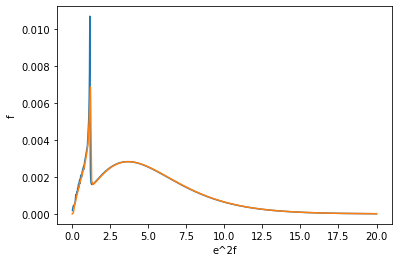

(251,)

In [12]:
test = np.load('0.00076x1e-10.npz')

dat = np.load('1x0.00049x3e-09-data.npz')
fe = dat['f_full']
epsilon = dat['eps_full']


plt.figure()
plt.plot(epsilon, epsilon**(2)*fe)
plt.plot(x, x**(2)*y_values(4))
plt.xlabel('e^2f')
plt.ylabel("f")
plt.show() ##proportional to a number density spectrum

In [13]:
distribution = np.zeros(len(epsilon))
total = trapezoid(epsilon, (epsilon**(2)*fe))
for i in range(0,len(distribution)-1):
    distribution[0] = 0
    sliced = trapezoid(epsilon[0:i+2], (epsilon[0:i+2]**(2)*fe[0:i+2]))
    a  = sliced/total
    distribution[i + 1]  = a 
print(total)

0.021450291354865435


In [14]:
rec_distribution = np.zeros(len(x))
total2 = trapezoid(x, x**(2)*y_values(4))
for i in range(0, len(rec_distribution)-1):
    distribution[0] = 0 
    sliced2 = trapezoid(x[0:i+2], x[0:i+2]**(2)*y_values(4)[0:i+2])
    b = sliced2/total2 
    rec_distribution[i + 1] = b
rec_distribution.shape
print(total2)

(251,)
0.02143532444786751


**KS-TEST PLOT BELOW**

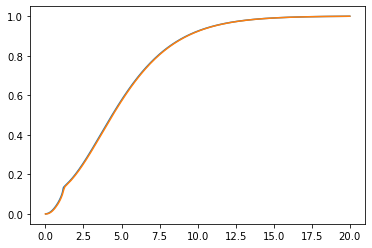

In [15]:
plt.figure()
plt.plot(epsilon, distribution)
plt.plot(x, rec_distribution)
plt.show()


**BElOW IS THE GENERAL FORM OF KS-STAT**

In [16]:
ks_test = [] 
ks_epsilon = epsilon[::4]
for i in range(0, len(x) - 1):
    eps_value = ks_epsilon[i]    ##we can replace this slice with k or general term
    x_value = x[i]
    diff = abs(eps_value - x_value)
    ks_test.append(diff)
ks_value = max(ks_test)
print(ks_value)    
print(ks_test)

0.020000000000003126
[0.02, 0.020000000000000004, 0.01999999999999999, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.019999999999999962, 0.020000000000000018, 0.020000000000000018, 0.019999999999999907, 0.020000000000000018, 0.020000000000000018, 0.019999999999999907, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.019999999999999796, 0.020000000000000018, 0.020000000000000018, 0.019999999999999796, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.019999999999999574, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020

**MAKING THE K X_AXIS (FROM FACTORS OF 1000)**

In [17]:
k_values = []
value = 1000
deviation = []
for i in range(1, value + 1):
        if value % i == 0:
            k_values.append(i)

**GENERAL FORM OF THE KS_STAT**

In [18]:
#I think that there could be something wierd with the way the loop reads 
#'ks_test' list. Look again at how we append into the list. 


for i in range(len(k_values)):
    current_k = k_values[i]
    ks_test = [] 
    ks_epsilon = epsilon[::current_k]
    x = new_epsilon[::current_k]
    for j in range(0, len(x) - 1): 
        eps_value = ks_epsilon[j]   
        x_value = x[j]
        diff = abs(eps_value - x_value)
        ks_test.append(diff)
    ks_value = max(ks_test)
    deviation.append(ks_value)

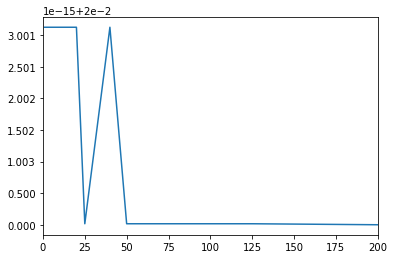

In [19]:
plt.figure()
plt.plot(k_values,deviation)
plt.xlim(0,200)
plt.show()